# Data inspection

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Loading the Dataset

In [15]:
data_path = "../../Data/arxiv_train.csv"

df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,abstract,label
0,31716,Automatic meeting analysis is an essential f...,eess
1,89533,We propose a protocol to encode classical bi...,quant-ph
2,82700,A number of physically intuitive results for...,quant-ph
3,78830,In the last decade rare-earth hexaborides ha...,physics
4,94948,We introduce the weak barycenter of a family...,stat


In [9]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  80000 non-null  int64 
 1   abstract    80000 non-null  object
 2   label       80000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [17]:
print("Number of unique labels:", df["label"].nunique())
print("Labels found:", df["label"].unique())

Number of unique labels: 10
Labels found: ['eess' 'quant-ph' 'physics' 'stat' 'math' 'astro-ph' 'cond-mat' 'hep-th'
 'cs' 'hep-ph']


## Class Distribution

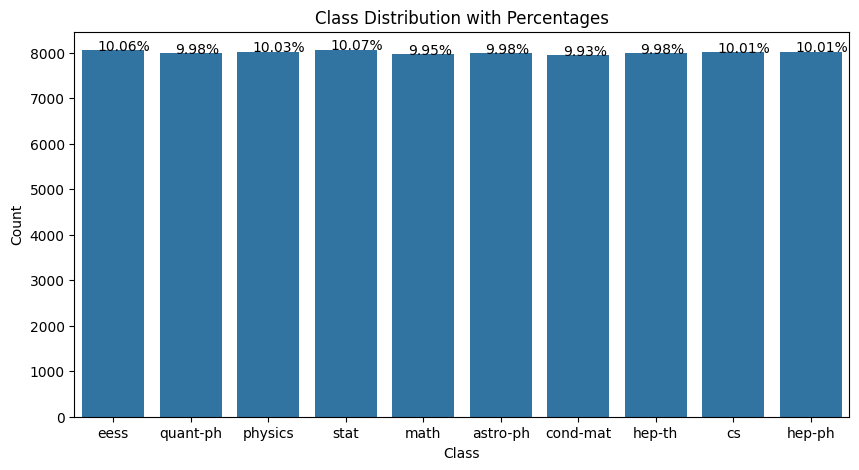

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label', data=df)

# Annotate bars with percentage
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 5))

plt.title("Class Distribution with Percentages")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

## Token lenght histogram

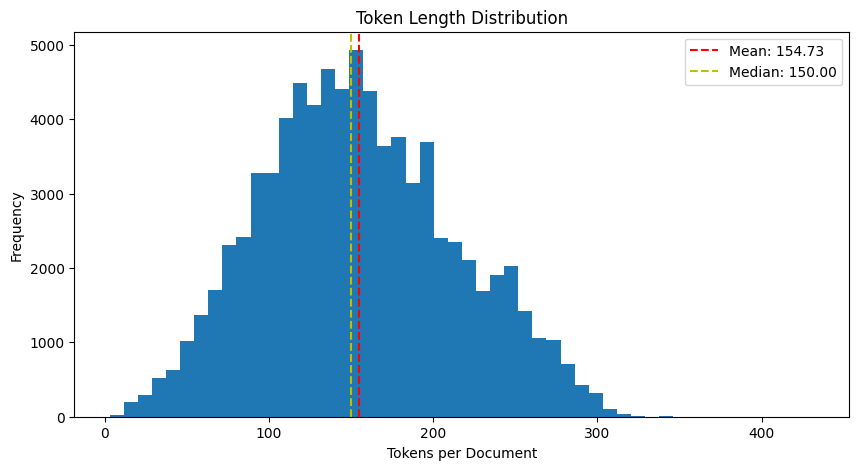

In [30]:
from collections import Counter
import matplotlib.pyplot as plt

token_lengths = df['abstract'].apply(lambda x: len(x.split()))
mean_len = token_lengths.mean()
median_len = token_lengths.median()

plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=50)
plt.axvline(mean_len, color='r', linestyle='--', label=f"Mean: {mean_len:.2f}")
plt.axvline(median_len, color='y', linestyle='--', label=f"Median: {median_len:.2f}")
plt.title("Token Length Distribution")
plt.xlabel("Tokens per Document")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Word frequency analysis

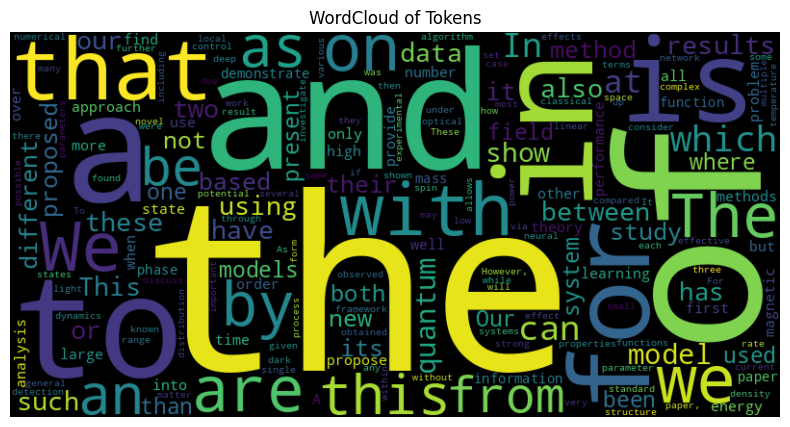

In [22]:
from collections import Counter
from wordcloud import WordCloud

all_tokens = " ".join(df['abstract']).split()
word_freq = Counter(all_tokens)
wc = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Tokens")
plt.show()

## Average document lenght

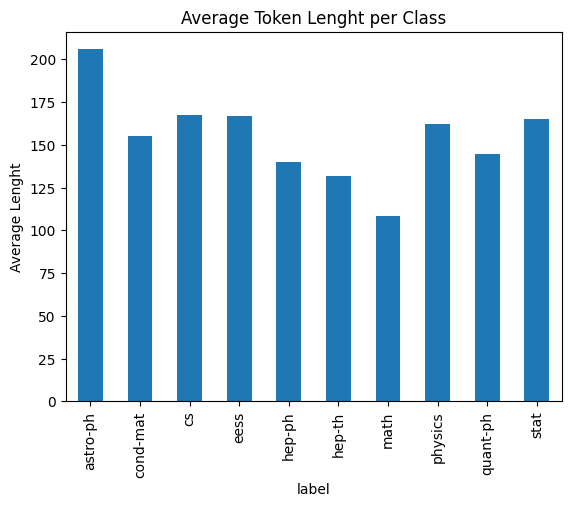

In [31]:
import numpy as np
df['length'] = df['abstract'].apply(lambda x: len(x.split()))
df.groupby('label')['length'].mean().plot(kind='bar')
plt.title("Average Token Lenght per Class")
plt.ylabel("Average Lenght")
plt.show()

## Average Lenght per Label

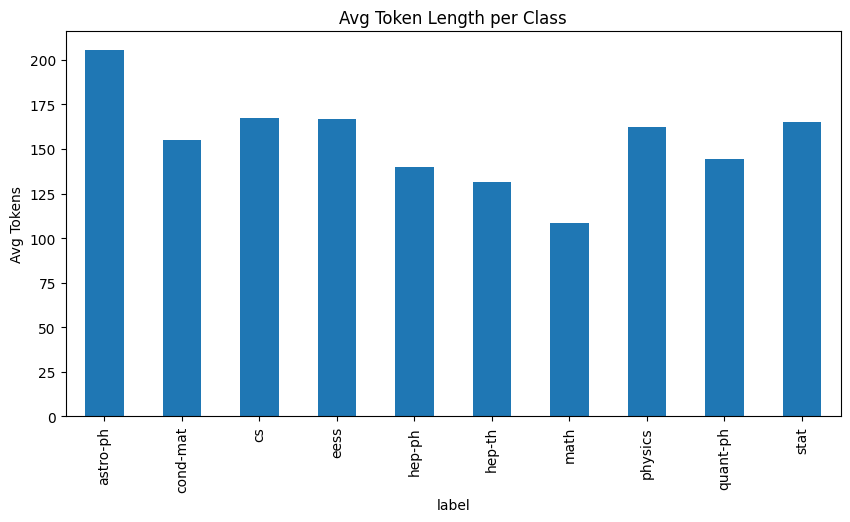

In [32]:
df["token_length"] = df["abstract"].apply(lambda x: len(x.split()))
df.groupby("label")["token_length"].mean().plot(kind="bar", figsize=(10, 5), title="Avg Token Length per Class")
plt.ylabel("Avg Tokens")
plt.show()

## Vocabulary Size

In [24]:
unique_words = set(word for text in df['abstract'] for word in text.split())
print("Vocabulary size: ", len(unique_words))

Vocabulary size:  432001


## Rare Word Proportion

In [35]:
all_words = [word for text in df["abstract"] for word in text.split()]
word_counts = Counter(all_words)

rare_words = [word for word, count in word_counts.items() if count == 1]
print(f"Rare words: {len(rare_words)} / {len(word_counts)} ({len(rare_words)/len(word_counts)*100:.2f}%)")


Rare words: 274926 / 432001 (63.64%)


## Top Tokens per Class

In [37]:
from collections import defaultdict

per_class_words = defaultdict(list)

for _, row in df.iterrows():
    per_class_words[row['label']].extend(row['abstract'].split())

for label in per_class_words:
    print(f"\nTop tokens for class {label}:")
    print(Counter(per_class_words[label]).most_common(10))



Top tokens for class eess:
[('the', 78044), ('of', 45585), ('and', 38387), ('to', 31093), ('a', 30987), ('in', 20221), ('is', 19015), ('for', 16338), ('with', 11313), ('that', 11262)]

Top tokens for class quant-ph:
[('the', 73890), ('of', 51547), ('a', 32124), ('and', 26368), ('to', 23863), ('quantum', 21950), ('in', 20461), ('is', 15465), ('for', 13948), ('that', 12692)]

Top tokens for class physics:
[('the', 85435), ('of', 56017), ('and', 36502), ('a', 29468), ('to', 27354), ('in', 24077), ('is', 17105), ('for', 14641), ('with', 12440), ('that', 11147)]

Top tokens for class stat:
[('the', 75838), ('of', 49718), ('and', 35497), ('a', 32599), ('to', 31135), ('in', 21954), ('is', 18957), ('for', 17488), ('that', 13923), ('on', 11600)]

Top tokens for class math:
[('the', 53818), ('of', 43721), ('a', 25407), ('and', 20576), ('to', 14548), ('is', 14092), ('in', 13306), ('for', 11763), ('that', 10301), ('we', 9906)]

Top tokens for class astro-ph:
[('the', 116047), ('of', 71521), ('and

## Duplicate Check

In [27]:
df.duplicated().sum()

np.int64(0)